# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars_facts_soup = soup(html, 'html.parser')



In [5]:
# Extract all rows of data
table = mars_facts_soup.find('table', class_='table')
print(table)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
table_headings = []
table_rows_data = []
# Loop through the scraped data to create a list of rows
# Extracting column headers from the table
header_elements = table.find_all('th')
for header in header_elements:
    table_headings.append(header.get_text().strip())

# Extracting data from each row in the table
data_row_elements = table.find_all('tr', class_='data-row')
for data_row in data_row_elements:
    row_values = []  # 'items' is now 'row_values' for clarity
    cell_data = data_row.find_all('td')
    for cell in cell_data:
        row_values.append(cell.text.strip())  # Clean each cell's text and append
    table_rows_data.append(row_values)

    

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(table_rows_data, columns=table_headings)

In [12]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_df[mars_df.columns[1]] = pd.to_datetime(mars_df[mars_df.columns[1]])
mars_df[mars_df.columns[2]] = mars_df[mars_df.columns[2]].astype(int) 
mars_df[mars_df.columns[3]] = mars_df[mars_df.columns[3]].astype(int)
mars_df[mars_df.columns[4]] = mars_df[mars_df.columns[4]].astype(int) 
mars_df[mars_df.columns[5]] = mars_df[mars_df.columns[5]].astype(float) 
mars_df[mars_df.columns[6]] = mars_df[mars_df.columns[6]].astype(float) 

In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
number_of_martian_months = mars_df['month'].nunique()
print(f"There are {number_of_martian_months} months on Mars represented in the dataset.")

There are 12 months on Mars represented in the dataset.


In [13]:
# Printing how many data exist in each month
mars_df['month'] = mars_df['month'].astype(int)
month_counts_correct_order = mars_df['month'].value_counts().sort_index()
print(month_counts_correct_order)

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [14]:
# 2. How many Martian days' worth of data are there?
unique_sols = mars_df['sol'].nunique()
print(f"{unique_sols}")

1867


In [16]:
# 3. What is the average low temperature by month?

# Converting non-convertible values to NaN, becasue of the previous errors 
mars_df['month'] = pd.to_numeric(mars_df['month'], errors='coerce')
mars_df['min_temp'] = pd.to_numeric(mars_df['min_temp'], errors='coerce')
mars_df['pressure'] = pd.to_numeric(mars_df['pressure'], errors='coerce')

# Droping rows with NaN in 'month' if any result from coercion, as  NaN values can't be grouped
mars_df = mars_df.dropna(subset=['month'])

# Converting 'month' to an integer to ensure clean grouping, now that NaN values have been handled 
mars_df['month'] = mars_df['month'].astype(int)

# Calculating mean 'min_temp' by 'month', rounding the result
mars_month_temp = mars_df[['month', 'min_temp']].groupby('month')['min_temp'].mean().round(2)

# Calculating mean 'pressure' by 'month', rounding the result
mars_month_pressure = mars_df[['month', 'pressure']].groupby('month')['pressure'].mean().round(2)

# Printing results
print("Average Minimum Temperature by Martian Month:")
print(mars_month_temp)


Average Minimum Temperature by Martian Month:
month
1    -77.16
2    -79.93
3    -83.31
4    -82.75
5    -79.31
6    -75.30
7    -72.28
8    -68.38
9    -69.17
10   -71.98
11   -71.99
12   -74.45
Name: min_temp, dtype: float64


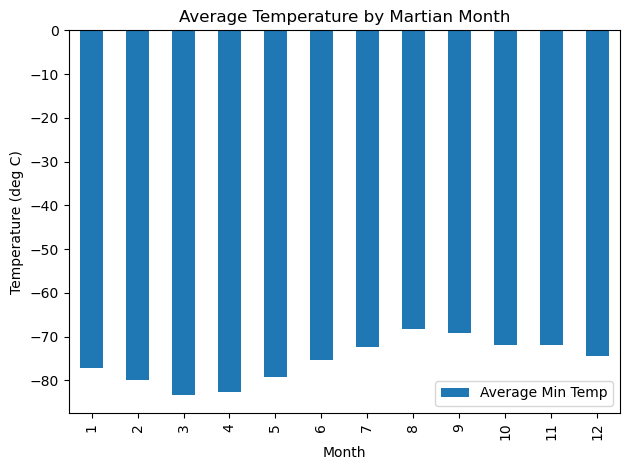

In [17]:
# Plot the average temperature by month
mars_month_temp.plot(kind='bar')

# Setting x-ticks to ensure all months are represented correctly
plt.xticks(ticks=range(len(mars_month_temp)), labels=mars_month_temp.index)

# Adding labels and title for clarity
plt.xlabel('Month')
plt.ylabel('Temperature (deg C)')
plt.title('Average Temperature by Martian Month')
plt.legend(['Average Min Temp'], loc='best')

plt.tight_layout()
plt.show()

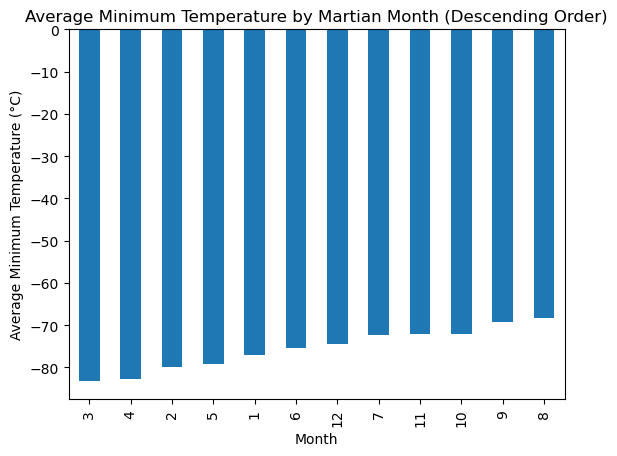

In [43]:
# Identify the coldest and hottest months in Curiosity's location

# Sorting the values in descending order
sorted_temps = mars_month_temp.sort_values(ascending=True)

sorted_temps.plot(kind="bar")
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Martian Month (Descending Order)')

# Show the plot
plt.show()

In [49]:
# 4. Average pressure by Martian month

# Calculating the average pressure for each month
average_pressure = mars_df.groupby('month')['pressure'].mean()
average_pressure_by_month = average_pressure.round(6)

print("Average pressure by Martian month:")
print(average_pressure)

Average pressure by Martian month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


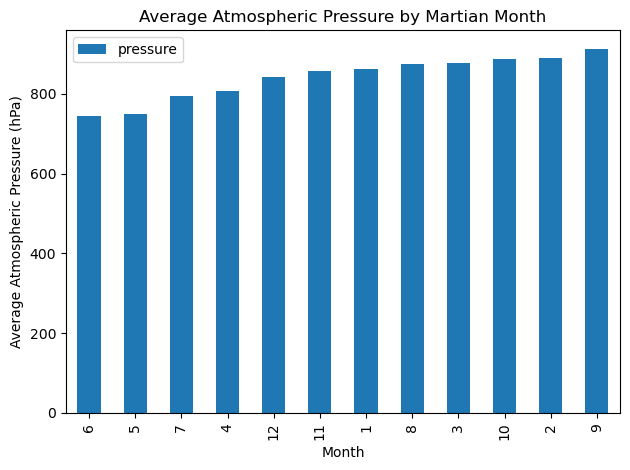

In [46]:
# Sorting the DataFrame by the 'pressure' column to get pressures in ascending order
mars_month_pressure_sorted = mars_month_pressure.sort_values(by='pressure', ascending=True)

# Plotting the sorted pressures as a bar chart
mars_month_pressure_sorted.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Average Atmospheric Pressure (hPa)")
plt.title("Average Atmospheric Pressure by Martian Month")
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()



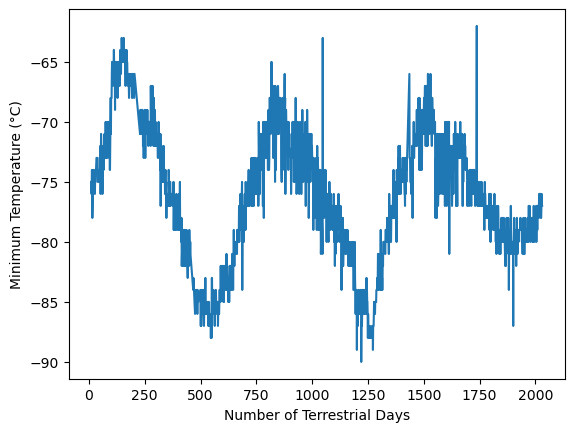

In [48]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# converting Sol numeric data type becasue of the errors
mars_df['sol'] = pd.to_numeric(mars_df['sol'], errors='coerce')

# Droping any rows that have NaN values after conversion
mars_df = mars_df.dropna(subset=['sol'])

# Continuing with the conversion of sols to Earth days and plotting
sol_to_earth_day_ratio = 1.027
mars_df['earth_days'] = mars_df['sol'] * sol_to_earth_day_ratio
plt.plot(mars_df['earth_days'], mars_df['min_temp'])
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [208]:
# Write the data to a CSV
mars_df.to_csv('Mars Temperature.csv')

In [209]:
browser.quit()